<a href="https://colab.research.google.com/github/yuliaplaksina/Machine-learning/blob/master/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install seaborn --upgrade

In [0]:
#импортируем библиотеки
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

# **Текстовое описание набора данных**

---


В качестве набора данных я использую набор данных "Топ 5000 каналов на сервисе YouTube"

Эта задача является актуальной в связи с развитием социальных медиа, для понимания, какие есть зависимости между популярностью каналов и другими параметрами.

В качестве датасета используется набор данных с гитхаба


---

### Каждый файл содержит следующие колонки:

*Rank* - рейтинг канала в данном наборе данных

*Grade* - класс YouTube каналов (A++/A+/A/A-/B+/B)

*Channel name* - название YouTube канала

*Video Uploads* - общее число загруженных видео на YouTube канал

*Subscribers* - общее число подписчиков YouTube канала

*Video views* - общее число просмотров всех видео YouTube канала


In [196]:
#Загружаем набор данных с гитхаба
#! git clone https://github.com/yuliaplaksina/Machine-learning.git

fatal: destination path 'Machine-learning' already exists and is not an empty directory.


In [0]:
data = pd.read_csv('/content/Machine-learning/data.csv', sep=",")

In [198]:
#первые 5 строчек таблицы
data.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433


In [199]:
data.shape

(5000, 6)

In [200]:
# Определим уникальные значения для целевого признака
data['Grade'].unique()

array(['A++ ', 'A+ ', 'A ', '\xa0 ', 'A- ', 'B+ '], dtype=object)

In [0]:
from sklearn.preprocessing import LabelEncoder


In [0]:
data['Grade'] = data['Grade'].replace('A++ ', '5')
data['Grade'] = data['Grade'].replace('A+ ', '4')
data['Grade'] = data['Grade'].replace('A ', '3')
data['Grade'] = data['Grade'].replace('A- ', '2')
data['Grade'] = data['Grade'].replace('B+ ', '1')

In [203]:
data['Grade'].unique()

array(['5', '4', '3', '\xa0 ', '2', '1'], dtype=object)

In [204]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 5000


In [205]:
#список колонок
data.columns

Index(['Rank', 'Grade', 'Channel name', 'Video Uploads', 'Subscribers',
       'Video views'],
      dtype='object')

In [206]:
# Список колонок с типами данных
data.dtypes

Rank             object
Grade            object
Channel name     object
Video Uploads    object
Subscribers      object
Video views       int64
dtype: object

In [0]:
data.rename(columns={'Channel name': 'Channel_name', 'Video Uploads': 'Video_Uploads', 'Video views': 'Video_views'}, inplace=True)

In [0]:
data = data.loc[data['Video_Uploads'] != "--"]
data = data.loc[data['Subscribers'] != "-- "]

In [0]:
data['Video_Uploads'] = data.Video_Uploads.astype(int)
data['Subscribers'] = data.Subscribers.astype(int)
data['Grade'] = data.Grade.astype(int)

#data = data.astype({"Video_Uploads": int, "Subscribers": int})

#pd.to_numeric(data.Video_Uploads)



---



In [210]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Rank - 0
Grade - 0
Channel_name - 0
Video_Uploads - 0
Subscribers - 0
Video_views - 0


In [211]:
# Основные статистические характеристки набора данных
data.describe()

,Grade,Video_Uploads,Subscribers,Video_views
count,4610.000000,4610.000000,4.610000e+03,4.610000e+03
mean,1.627983,4085.745987,2.621527e+06,1.138403e+09
std,0.837268,17726.160260,3.927263e+06,2.068706e+09
min,1.000000,1.000000,3.010000e+02,7.500000e+01
25%,1.000000,148.000000,6.101925e+05,2.189184e+08
50%,1.000000,464.000000,1.350884e+06,5.368886e+08
75%,2.000000,1592.500000,2.950921e+06,1.195115e+09
max,5.000000,422326.000000,6.599531e+07,4.754884e+10


# Визуальное исследование датасета
---
Для визуального исследования могут быть использованы различные виды диаграмм, построим только некоторые варианты диаграмм, которые используются достаточно часто.

### Диаграмма рассеяния

Позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости. Не предполагается, что значения упорядочены (например, по времени).

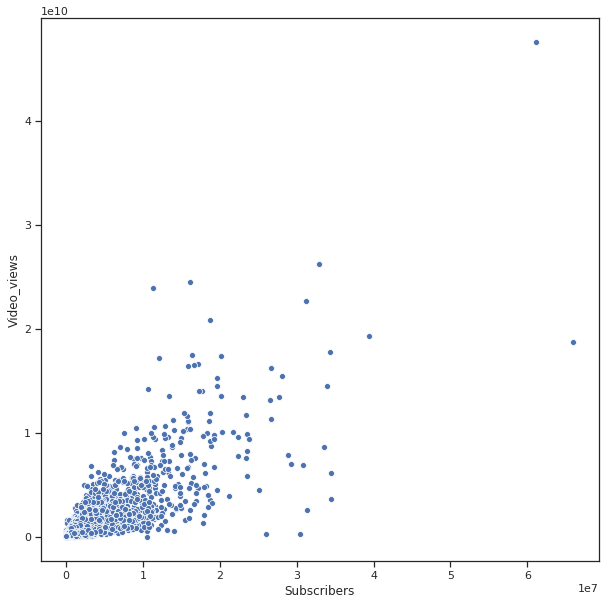

In [212]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Subscribers', y='Video_views', data=data)

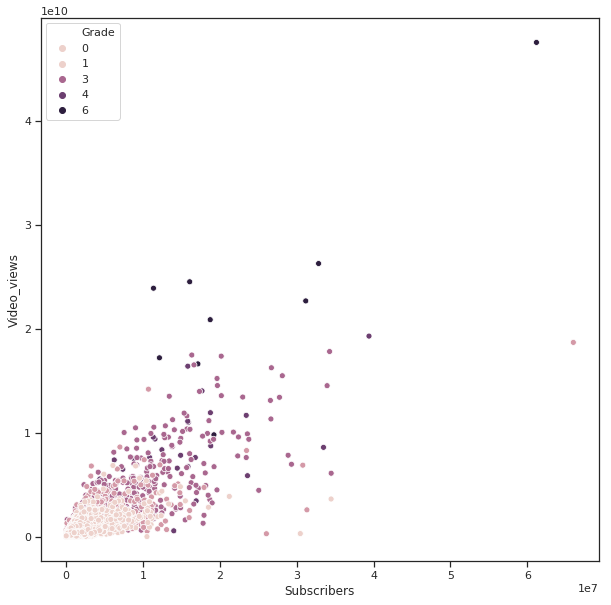

In [213]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Subscribers', y='Video_views', data=data, hue='Grade')

### Гистограмма

Позволяет оценить плотность вероятности распределения данных.

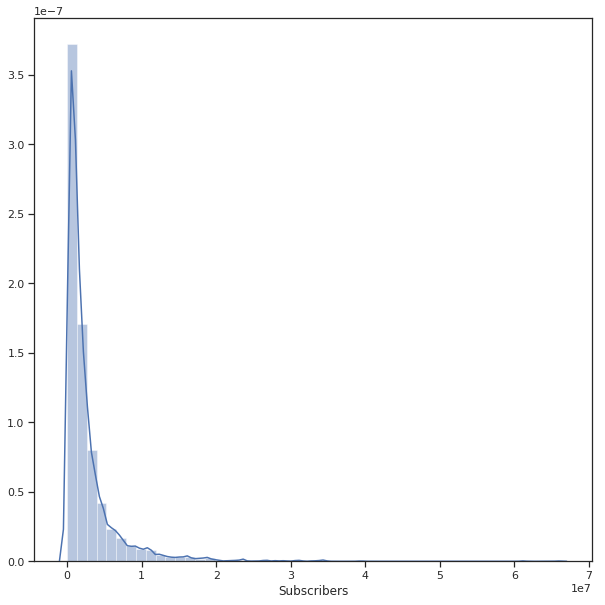

In [214]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['Subscribers'])

### Jointplot
Комбинация гистограмм и диаграмм рассеивания.

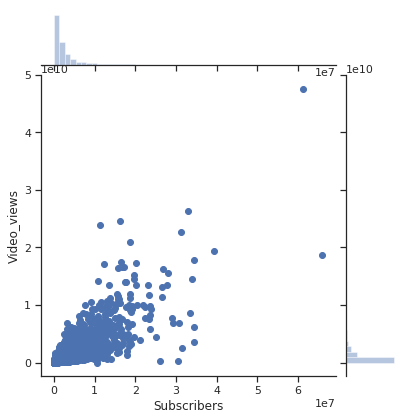

In [215]:
sns.jointplot(x='Subscribers', y='Video_views', data=data)

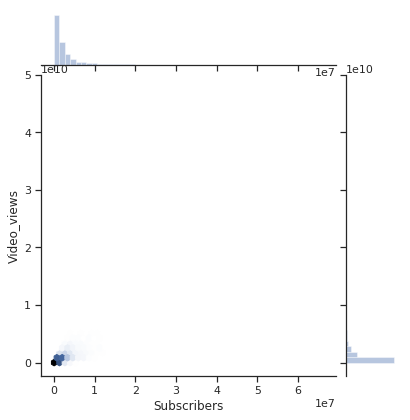

In [216]:
sns.jointplot(x='Subscribers', y='Video_views', data=data, kind="hex")

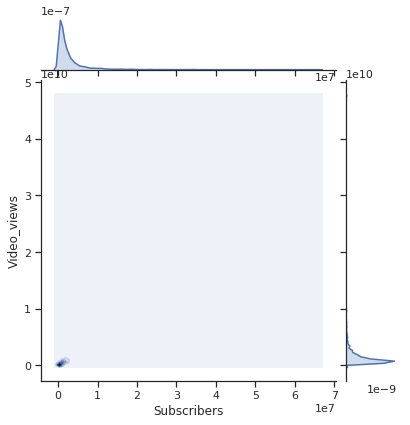

In [217]:
sns.jointplot(x='Subscribers', y='Video_views', data=data, kind="kde")

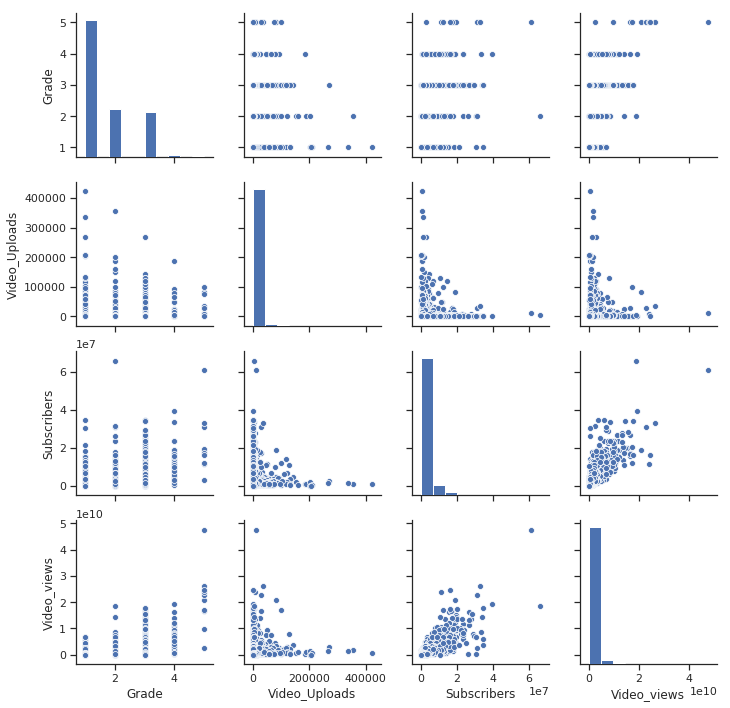

In [218]:
sns.pairplot(data)

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


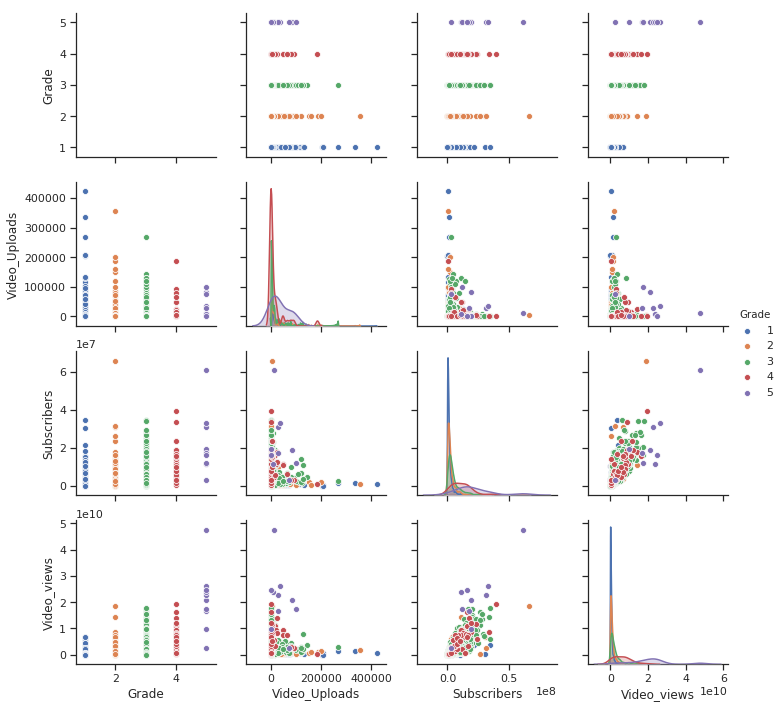

In [219]:
sns.pairplot(data, hue="Grade")

### Ящик с усами
Отображает одномерное распределение вероятности.

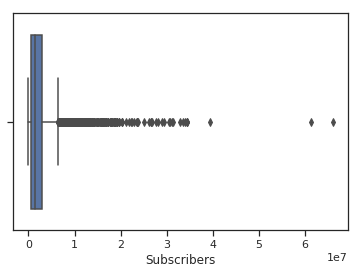

In [220]:
sns.boxplot(x=data['Subscribers'])

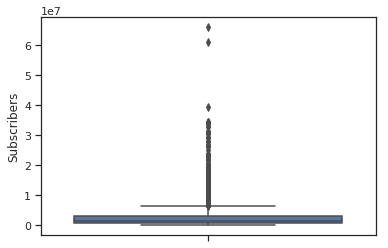

In [221]:
# По вертикали
sns.boxplot(y=data['Subscribers'])

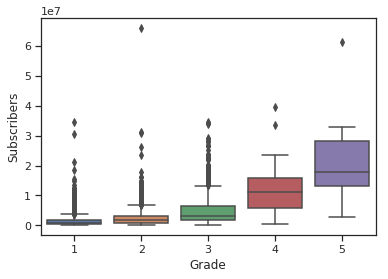

In [222]:
# Распределение параметра Humidity сгруппированные по Occupancy.
sns.boxplot(x='Grade', y='Subscribers', data=data)

### Violin plot

По краям отображаются распредление плотности. Это можно увидеть на сравнении двух графиков 

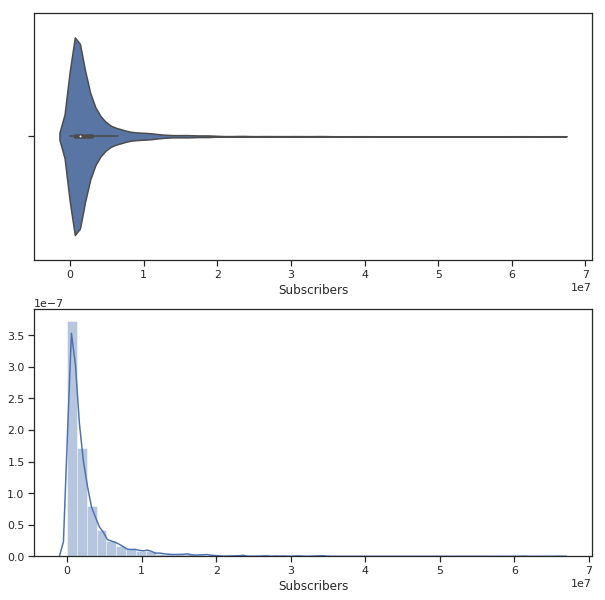

In [223]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['Subscribers'])
sns.distplot(data['Subscribers'], ax=ax[1])

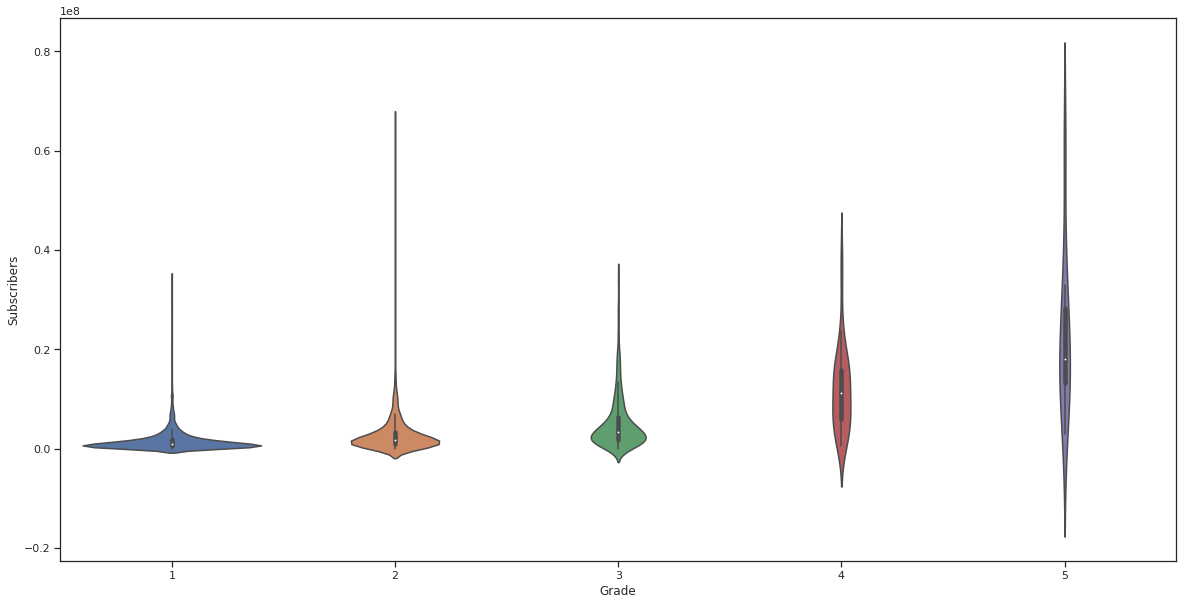

In [224]:
# Распределение параметра Humidity сгруппированные по Occupancy.
fig, ax = plt.subplots(figsize=(20,10)) 
sns.violinplot(ax=ax, x='Grade', y='Subscribers', data=data)

# Информация о корреляции признаков

In [225]:
data.corr()

,Grade,Video_Uploads,Subscribers,Video_views
Grade,1.000000,0.088773,0.429213,0.477423
Video_Uploads,0.088773,1.000000,0.011362,0.087830
Subscribers,0.429213,0.011362,1.000000,0.791241
Video_views,0.477423,0.087830,0.791241,1.000000


На основе корреляционной матрицы можно сделать следующие выводы:


*   Ни один из признаков не имеет очень сильной и сильной корреляции с целевым признаком. Это может говорить о том, что в рассчитывании целевого признака используется более сложная формула, высчитанная с помощью нескольких параметров
*   Целевой признак отчасти коррелируют с количеством подписчиков (0,43) и количеством просмотров (0,48). Эти признаки необходимо оставить в модели
*   Целевой признак очень слабо коррелирует с количеством загруженных видео (0,08). Возможно, этот признак стоит изключить из модели, чтобы не ухудшить качество модели.
*   Признаки количество подписчиков и просмотров видео сильно коррелируют между собой (0,79), однако их не стоит изключать из модели.





In [227]:
data.corr(method='pearson')

,Grade,Video_Uploads,Subscribers,Video_views
Grade,1.000000,0.088773,0.429213,0.477423
Video_Uploads,0.088773,1.000000,0.011362,0.087830
Subscribers,0.429213,0.011362,1.000000,0.791241
Video_views,0.477423,0.087830,0.791241,1.000000


In [228]:

data.corr(method='spearman')

,Grade,Video_Uploads,Subscribers,Video_views
Grade,1.000000,0.121785,0.434231,0.456935
Video_Uploads,0.121785,1.000000,0.209186,0.395023
Subscribers,0.434231,0.209186,1.000000,0.828672
Video_views,0.456935,0.395023,0.828672,1.000000


In [229]:
data.corr(method='kendall')

,Grade,Video_Uploads,Subscribers,Video_views
Grade,1.000000,0.094947,0.343662,0.362243
Video_Uploads,0.094947,1.000000,0.140524,0.276351
Subscribers,0.343662,0.140524,1.000000,0.643638
Video_views,0.362243,0.276351,0.643638,1.000000


Данные различных методов корреляций не сильно отличаются друг от друга. При этом метод Пирсона дает средние значения по основным параметрам.

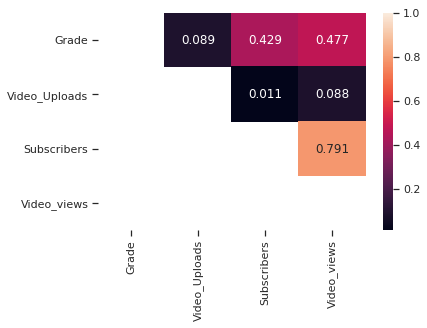

In [232]:
# Треугольный вариант тепловой матрицы корреляций с выводом значений в ячейки
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.3f')

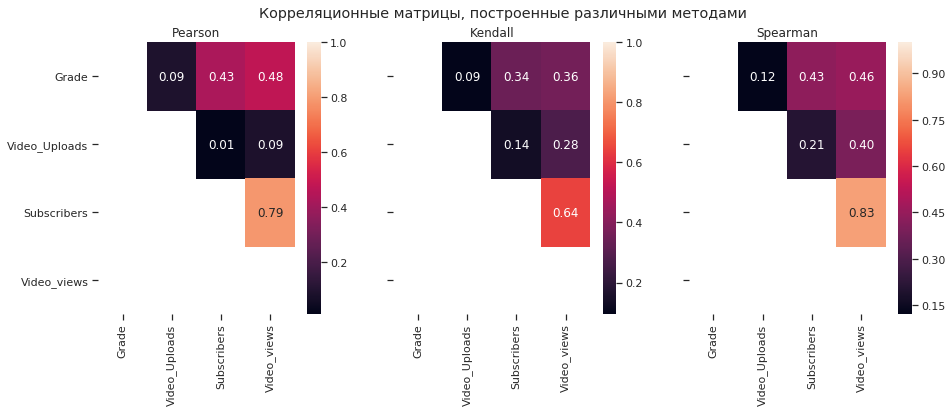

In [233]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))

mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.tril_indices_from(mask)] = True

sns.heatmap(data.corr(method='pearson'), ax=ax[0], mask=mask, annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], mask=mask, annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], mask=mask, annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

На тепловой карте отчетливо видно, что целевой признак не имеет сильной корреляции с другими параметрами. Скорее всего здесь имеет место групповая корреляция. С данным датасетом можно было бы попробовать испольлзовать вариант визуализации "Солнечная корреляционная карта", однако в блокнот пока что он не встраивается